In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

biomechanical-features-of-orthopedic-patients



In [5]:
# read csv (comma separated value) into data
data = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['classic', 'seaborn-poster', 'dark_background', 'seaborn-ticks', 'seaborn-muted', 'seaborn-deep', 'fivethirtyeight', 'grayscale', 'seaborn-notebook', 'ggplot', 'bmh', 'seaborn-paper', 'fast', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn', 'seaborn-talk', 'seaborn-white', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-dark-palette', 'Solarize_Light2', '_classic_test', 'seaborn-darkgrid']




# **EXPLORATORY DATA ANALYSIS (EDA)**


In [6]:

data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


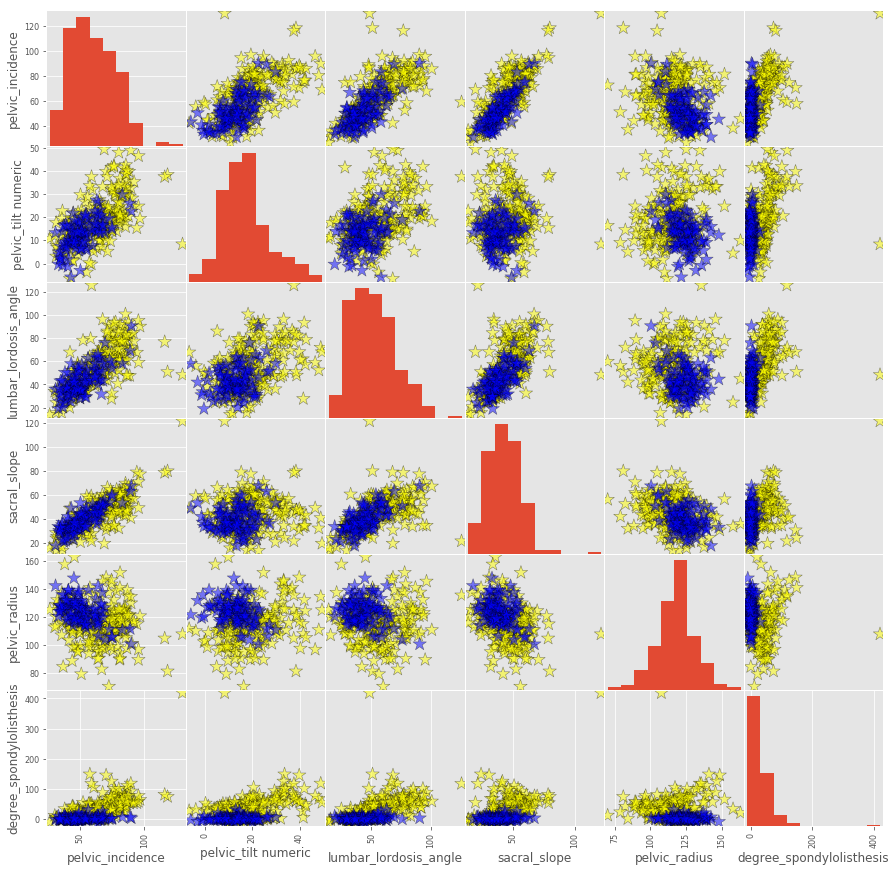

In [10]:
color_list = ['yellow' if i=='Abnormal' else 'blue' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()


Abnormal    210
Normal      100
Name: class, dtype: int64

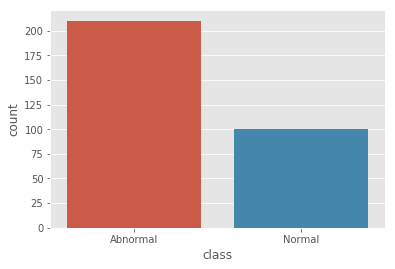

In [11]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

# **K-NEAREST NEIGHBORS (KNN)**

In [12]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [13]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


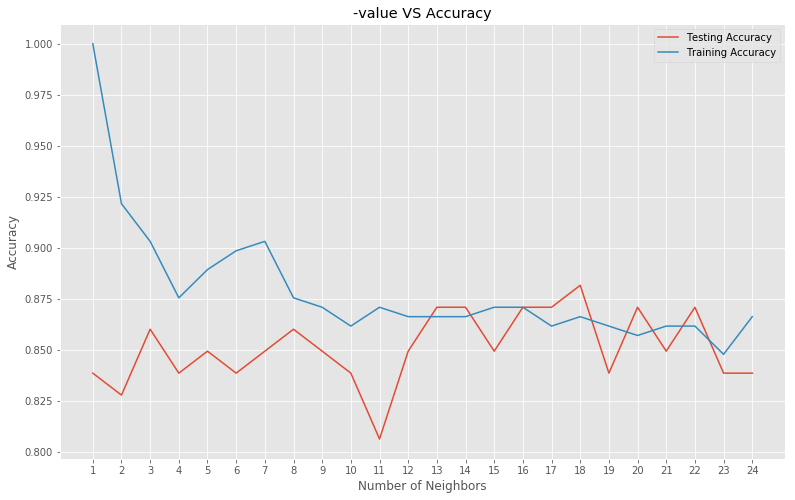

Best accuracy is 0.8817204301075269 with K = 18


In [14]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


# **REGRESSION**
# 

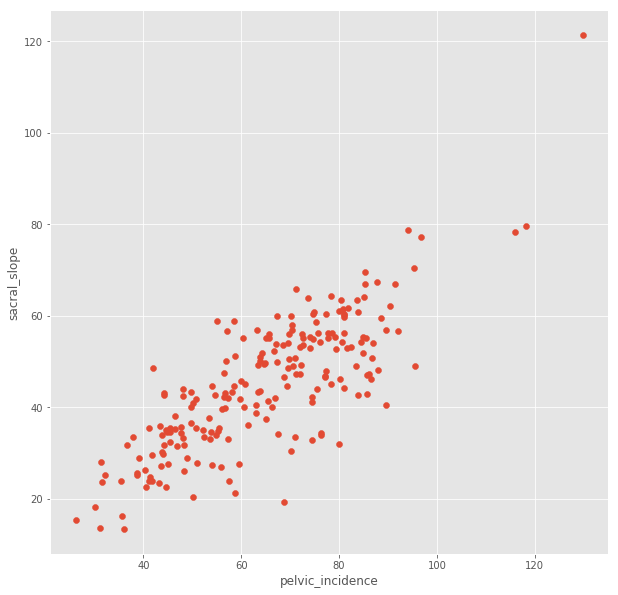

In [15]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


# **Linear regression**


R^2 score:  0.6458410481075871


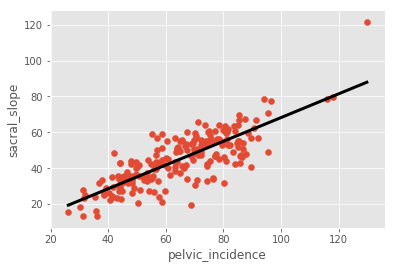

In [16]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


# **CROSS VALIDATION**
# 


In [17]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848676


**Regularized Regression**


In [18]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997


In [19]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


In [20]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[58  8]
 [ 7 20]]
Classification report: 
              precision    recall  f1-score   support

   Abnormal       0.89      0.88      0.89        66
     Normal       0.71      0.74      0.73        27

avg / total       0.84      0.84      0.84        93



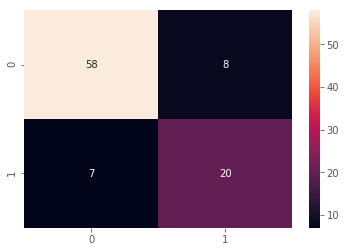

In [21]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

# **ROC Curve with Logistic Regression**

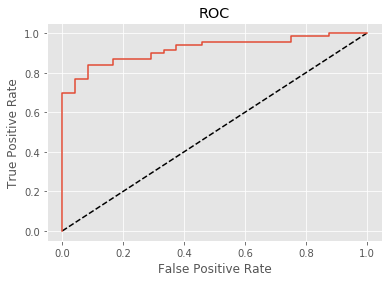

In [22]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()



# **HYPERPARAMETER TUNING**



In [23]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7548387096774194


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:735: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))


Tuned hyperparameters : {'C': 100.0, 'penalty': 'l2'}
Best Accuracy: 0.8525345622119815


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:735: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



# **PRE-PROCESSING DATA**


In [26]:
# Load data
data = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
# get_dummies
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [27]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True) 
df.head(10)
# instead of two steps we can make it with one step pd.get_dummies(data,drop_first = True)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [29]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:735: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
